# Análisis fuga de clientes



**Autor**: Roberto Muñoz Soria - Roberto González

**Github**: https://github.com/rpmunoz

<br>

El objetivo del proyecto es aplicar un algoritmo de árboles de decisión para construir un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones. A partir de los resultados de este modelo y del análisis realizado, deberán proponer 4 acciones de retención de clientes.

### Cargar las librerias

In [ ]:
install.packages(c("rpart.plot","eeptools"), dependencies = TRUE, INSTALL_opts = '--no-lock', verbose = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL --no-lock

also installing the dependencies ‘viridis’, ‘Hmisc’, ‘arm’


foundpkgs: viridis, Hmisc, arm, rpart.plot, eeptools, /tmp/Rtmp0qUMGU/downloaded_packages/viridis_0.5.1.tar.gz, /tmp/Rtmp0qUMGU/downloaded_packages/Hmisc_4.5-0.tar.gz, /tmp/Rtmp0qUMGU/downloaded_packages/arm_1.11-2.tar.gz, /tmp/Rtmp0qUMGU/downloaded_packages/rpart.plot_3.0.9.tar.gz, /tmp/Rtmp0qUMGU/downloaded_packages/eeptools_1.2.4.tar.gz

files: /tmp/Rtmp0qUMGU/downloaded_packages/viridis_0.5.1.tar.gz, 
	/tmp/Rtmp0qUMGU/downloaded_packages/Hmisc_4.5-0.tar.gz, 
	/tmp/Rtmp0qUMGU/downloaded_packages/arm_1.11-2.tar.gz, 
	/tmp/Rtmp0qUMGU/downloaded_packages/rpart.plot_3.0.9.tar.gz, 
	/tmp/Rtmp0qUMGU/downloaded_packages/eeptools_1.2.4.tar.gz

1): succeeded '/usr/lib/R/bin/R CMD INSTALL --no-lock -l '/usr/local/lib/R/site-library' '/tmp/Rtmp0qUMGU/downloaded_packages/viridis_0.5.1.tar.gz''

2):

In [ ]:
library(dplyr) 
library(ggplot2)
library(readxl)
library(eeptools)
library(magrittr)
library(rpart)
library(rpart.plot)

### Cargamos y transformamos el dataset



In [ ]:
dataURL = 'https://rmunoz-public.s3.amazonaws.com/ml/Proyecto+1+-+Base+analisis+de+fuga.xls'
dataFile = 'Proyecto_1_Base_analisis_de_fuga.xls'

download.file(url = dataURL, destfile=dataFile)

In [ ]:
dataset <- read_xls(dataFile)

cat("\nPrimeras 5 filas")
head(dataset)


Primeras 5 filas

IdCliente,Plan Internacional Preferente,Plan Internet Ilimitado,MB navegados,Total minutos horario normal,Total llamadas horario normal,Cobro llamadas horario normal,Total minutos horario reducido,Total llamadas horario reducido,Cobro llamadas horario reducido,Total minutos horario nocturno,Total llamadas horario nocturno,Cobro llamadas horario nocturno,Total minutos llamadas internacionales,Total llamadas internacionales,Cobro llamadas internacionales,Llamadas a servicio de atención al cliente,Fuga
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,No,Si,2500,265.1,110,24834,197.4,99,9246,244.7,91,6067,10.0,3,1488,1,Vigente
2,No,Si,2600,161.6,123,15136,195.5,103,9158,254.4,103,6309,13.7,3,2039,1,Vigente
3,No,No,0,243.4,114,22800,121.2,110,5675,162.6,104,4033,12.2,5,1813,0,Vigente
4,Si,No,0,299.4,71,28046,61.9,88,2898,196.9,89,4882,6.6,7,818,2,Vigente
5,Si,No,0,166.7,113,15615,148.3,122,6948,186.9,121,4634,10.1,3,1252,3,Vigente
6,Si,No,0,223.4,98,20927,220.6,101,10331,203.9,118,5058,6.3,6,781,0,Vigente


Transformamos el campo Fuga en una variable categorica

In [ ]:
dataset$Fuga <- as.factor(dataset$Fuga)

Definimos dataset de entrenamiento

In [ ]:
set.seed(2101)
train<-sample(2, nrow(dataset), replace=TRUE, prob=c(0.7,0.3))


Entrenamiento del modelo

In [ ]:
set.seed(8)

modelo.1 <- rpart(Fuga ~ ., data = dataset[train==1,])

Graficamos los resultados

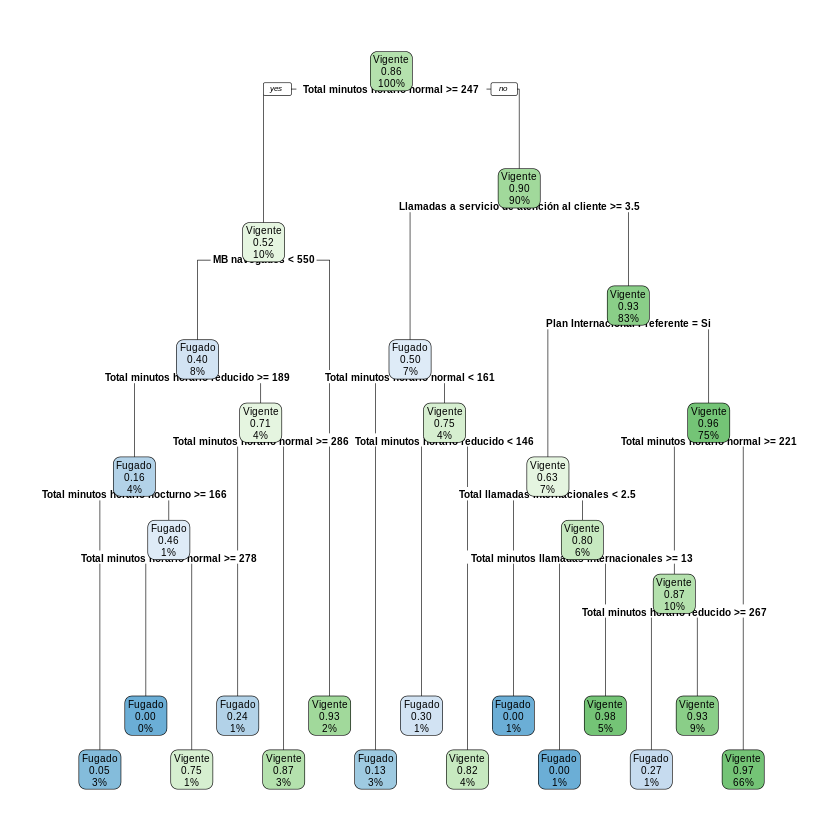

In [ ]:
rpart.plot(modelo.1, cex=0.5, roundint=FALSE)

In [ ]:
png("arbol_decision_modelo_1.png", width=2560, height=1440)
prp(modelo.1, type = 4, extra = 101, leaf.round = 1, fallen.leaves = TRUE,
    varlen = 0, tweak = 1.5, roundint=FALSE)
dev.off()

Hacemos una prediccion usando el conjunto de datos de validacion

In [ ]:
fuga_predict <- predict(modelo.1, dataset[train==2,], type='class')

In [ ]:
tconf <- table(fuga_predict, dataset[train==2,]$Fuga)
tconf


            
fuga_predict Fugado Vigente
     Fugado     155      28
     Vigente     59    1280

### Uso de libreria caret

Instalamos la libreria caret